In [2]:
import matplotlib.pyplot as plt
import numpy as np

a = 4

In [45]:
def periodic_graphene(num_x, num_y, a=1, if_draw=False, if_periodic=False):
    v1 = np.array([3/2, np.sqrt(3)/2]) * a
    v2 = np.array([3/2, -np.sqrt(3)/2]) * a

    coords = []
    for x in range(num_x):
        for y in range(num_y):
            coords.append(x * v1 + y * v2 + [-a/2, 0])
            coords.append(x * v1 + y * v2 + [a/2, 0])
            
    
    
    adjancency = [np.array([0, 1]) + y + 2*num_y * x for y in range(2*num_y-1) for x in range(num_x)]
    adjancency += [np.array([2*y+1, 2*y+1+2*num_y-1]) + 2*num_y*x for y in range(num_y) for x in range(num_x-1)]
    
    periodic_adjancency = []
    if if_periodic:
        periodic_adjancency = [np.array([0, 2*((num_x-1)*num_y+1)-1]) + 2*y for y in range(num_y)]
        periodic_adjancency += [np.array([0, 2*num_y-1]) + 2*num_y * x for x in range(num_x)]
    

    if if_draw:
        plt.scatter([c[0] for c in coords], [c[1] for c in coords], color="k") 
 
        for (ind1, ind2) in adjancency:
            plt.plot([coords[ind1][0], coords[ind2][0]], [coords[ind1][1], coords[ind2][1]], 'r-', linewidth=2)

        for (ind1, ind2) in periodic_adjancency:
            plt.plot([coords[ind1][0], coords[ind2][0]], [coords[ind1][1], coords[ind2][1]], 'b-', linewidth=2)
        
        for (ind, (x, y)) in enumerate(coords):
            plt.text(x, y, f"  {ind}", fontsize=10)
            
        plt.plot(title="$(num_x)x$(num_y) graphe")            
        plt.gca().set_aspect('equal')
    
        
    adjancency += periodic_adjancency
        
    return coords, adjancency


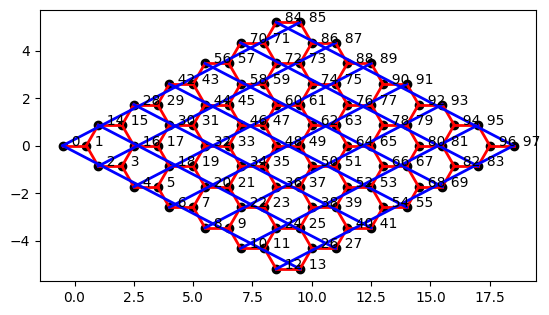

In [47]:
num_x, num_y = 7, 7
coords, adjancency = periodic_graphene(num_x, num_y, if_draw=True, if_periodic=True) 

In [99]:
def periodic_graphene_2(num_x, num_y, a=1, if_draw=False, if_periodic=False):
    if np.mod(num_x, 2) != 0:
        raise ValueError("num_x should be an even number")
    

    pair_1 = np.array([[0, 0], [-1/2, np.sqrt(3)/2]]) * a
    chain_1 = []
    for y in range(num_y):
        chain_1 += [atom + np.array([0, np.sqrt(3) * a * y]) for atom in pair_1]
        
    pair_2 = np.array([[1, 0], [3/2, np.sqrt(3)/2]]) * a
    chain_2 = []
    for y in range(num_y):
        chain_2 += [atom + np.array([0, np.sqrt(3) * a * y]) for atom in pair_2]
    
    coords = []
    for x in range(num_x):
        if np.mod(x, 2) == 0:
            coords += [item + np.array([[3 * a * np.floor(x/2), 0]]) for item in chain_1]

        if np.mod(x, 2) == 1:
            coords += [item + np.array([[3 * a * np.floor(x/2), 0]]) for item in chain_2]
            
    coords = [item[0] for item in coords]

    adjancency = [np.array([0, 1]) + y + 2*num_y * x for y in range(2*num_y-1) for x in range(num_x)]
    adjancency += [np.array([2*y, 2*y+2*num_y]) + 2*num_y*x for y in range(num_y) for x in range(0, num_x-1, 2)]
    adjancency += [np.array([2*y+1, 2*y+2*num_y+1]) + 2*num_y*x for y in range(num_y) for x in range(1, num_x-1, 2)]

    periodic_adjancency = []
    if if_periodic:
        periodic_adjancency = [np.array([1, 2*(num_x-1)*num_y+1]) + 2*y for y in range(num_y)]
        periodic_adjancency += [np.array([0, 2*num_y-1]) + 2*num_y * x for x in range(num_x)]
        

    if if_draw:
        plt.scatter([c[0] for c in coords], [c[1] for c in coords], color="k") 
 
        for (ind1, ind2) in adjancency:
            plt.plot([coords[ind1][0], coords[ind2][0]], [coords[ind1][1], coords[ind2][1]], 'r-', linewidth=2)

        for (ind1, ind2) in periodic_adjancency:
            plt.plot([coords[ind1][0], coords[ind2][0]], [coords[ind1][1], coords[ind2][1]], 'b-', linewidth=2)
        
        for (ind, (x, y)) in enumerate(coords):
            plt.text(x, y, f"  {ind}", fontsize=10)
            
        plt.plot(title="$(num_x)x$(num_y) graphe")            
        plt.gca().set_aspect('equal')

    adjancency += periodic_adjancency
    
    return coords, adjancency

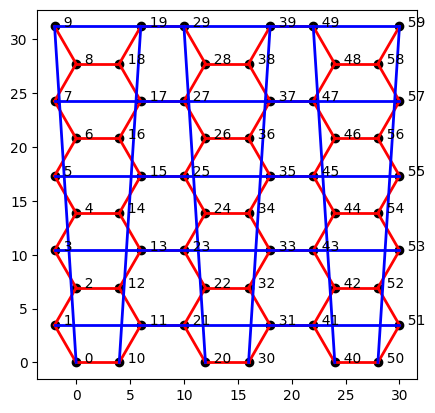

In [100]:
coords, adjancency = periodic_graphene_2(6, 5, a = 4, if_draw=True, if_periodic=True) ;  